In [1]:
#import packages
import pandas as pd
import numpy as np
from pandas import read_csv
import unicodedata
import matplotlib.pyplot as plt
# Load the regular expression library
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Import the wordcloud library
from wordcloud import WordCloud
from PIL import Image
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
from gensim.models import CoherenceModel
import numpy as np
import tqdm
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [2]:
#load data 
data = pd.read_csv("Data_Covid.csv")

#suppression colonne date
data.drop(["Horodateur","Est-ce que vous êtes étudiant(e)"], axis = 1, inplace = True)   


In [3]:
data

,1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je me sens plus nerveux et anxieux que d'habitude(أشعر بالتوتر والقلق أكثر من المعتاد)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [J'ai peur sans aucune raison(خائف بلا سبب)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je m'énerve facilement ou je panique],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [(أشعر بالرغبة في الإنهيار) J'ai l'impression de m'effondrer ],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je sens que tout va bien et qu'il ne se passera rien de mal(أشعر أن كل شيء على ما يرام ولن يحدث شيء سيء)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Mes bras et mes jambes tremblent],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je suis gêné par un mal de tête et de dos(منزعج من الصداع وآلام الظهر)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je me sens faible et je me fatigue facilement.],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je me sens calme et je peux rester assis sans bouger],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je peux sentir mon cœur battre plus vite],...,1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Mes mains sont généralement sèches et chaudes],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Mon visage devient chaud et rougit],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [Je m'endors facilement et je me repose toute nuit(أنام ​​بسهولة وأرتاح طوال الليل)],1: rarement; 2 : parfois; 3 : souvent; 4 : très souvent [J'ai des cauchemars],Sexe,Établissement actuel,Année d'étude,Résidence pendant les études,Age,"En tant qu'étudiant, quels sont vos soucis et inquiétudes? exprimez-vous"
0,Parfois,Souvent,Parfois,Très souvent,Rarement,Parfois,Très souvent,Très souvent,Parfois,Très souvent,...,Rarement,Souvent,Rarement,Rarement,Femme,Ecole d’ingénieur,2ème année,Seul(e),20-22,NaN
1,Très souvent,Très souvent,Très souvent,Très souvent,Rarement,Très souvent,Très souvent,Très souvent,Très souvent,Très souvent,...,Rarement,Parfois,Rarement,Très souvent,Femme,Ecole d’ingénieur,4ème année,Avec famille,20-22,"Avenir ,"
2,Parfois,Rarement,Parfois,Parfois,Très souvent,Rarement,Parfois,Parfois,Rarement,Rarement,...,Rarement,Rarement,Parfois,Rarement,Homme,Ecole d’ingénieur,3ème année,Seul(e),20-22,est ce que la vie restera toujours comme ca av...
3,Rarement,Rarement,Rarement,Rarement,Parfois,Rarement,Rarement,Rarement,Parfois,Rarement,...,Rarement,Rarement,Très souvent,Rarement,Femme,Ecole d’ingénieur,3ème année,Seul(e),20-22,NaN
4,Rarement,Parfois,Très souvent,Rarement,Parfois,Souvent,Parfois,Rarement,Très souvent,Souvent,...,Parfois,Rarement,Parfois,Parfois,Femme,Ecole d’ingénieur,3ème année,Seul(e),20-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,Rarement,Rarement,Rarement,Rarement,Très souvent,Rarement,Souvent,Souvent,Très souvent,Rarement,...,Souvent,Souvent,Parfois,Rarement,Homme,Faculté des sciences,5ème année,Seul(e),22-24,NaN
714,Très souvent,Très souvent,Très souvent,Très souvent,Rarement,Très souvent,Très souvent,Très souvent,Parfois,Très souvent,...,Très souvent,Très souvent,Rarement,Souvent,Femme,Facultés des sciences et techniques,1ère années,Seul(e),18-20,NaN
715,Parfois,Parfois,Très souvent,Rarement,Parfois,Parfois,Très souvent,Très souvent,Rarement,Parfois,...,Parfois,Parfois,Parfois,Parfois,Femme,Ecole d’ingénieur,3ème année,Avec famille,22-24,NaN
716,Parfois,Parfois,Rarement,Rarement,Rarement,Rarement,Rarement,Rarement,Rarement,Rarement,...,Rarement,Rarement,Souvent,Rarement,Homme,Faculté des sciences économiques juridiques et...,2ème année,Avec famille,18-20,NaN


In [4]:
data.columns = ["Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9","Q10","Q11","Q12","Q13", "Q14","Q15","Q16","Q17","Q18","Q19","Q20","sexe","etablissement","annee","residence","age", "question"]

In [5]:
#Etablissement
dataset = data.values
etablissement = dataset[:,21].tolist()

In [6]:
#suppression des espaces au debut et à la fin + normalisation : suppression des accents + majuscule 
for i in range(0,len(etablissement)):
    etablissement[i] = unicodedata.normalize('NFKD',str(etablissement[i]).lstrip().rstrip()).encode('ascii', 'ignore').upper()
    

In [7]:
data["etablissement"] = data["etablissement"].replace(dataset[:,21], etablissement)

In [8]:
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q17,Q18,Q19,Q20,sexe,etablissement,annee,residence,age,question
0,Parfois,Souvent,Parfois,Très souvent,Rarement,Parfois,Très souvent,Très souvent,Parfois,Très souvent,...,Rarement,Souvent,Rarement,Rarement,Femme,b'ECOLE DINGENIEUR',2ème année,Seul(e),20-22,NaN
1,Très souvent,Très souvent,Très souvent,Très souvent,Rarement,Très souvent,Très souvent,Très souvent,Très souvent,Très souvent,...,Rarement,Parfois,Rarement,Très souvent,Femme,b'ECOLE DINGENIEUR',4ème année,Avec famille,20-22,"Avenir ,"
2,Parfois,Rarement,Parfois,Parfois,Très souvent,Rarement,Parfois,Parfois,Rarement,Rarement,...,Rarement,Rarement,Parfois,Rarement,Homme,b'ECOLE DINGENIEUR',3ème année,Seul(e),20-22,est ce que la vie restera toujours comme ca av...
3,Rarement,Rarement,Rarement,Rarement,Parfois,Rarement,Rarement,Rarement,Parfois,Rarement,...,Rarement,Rarement,Très souvent,Rarement,Femme,b'ECOLE DINGENIEUR',3ème année,Seul(e),20-22,NaN
4,Rarement,Parfois,Très souvent,Rarement,Parfois,Souvent,Parfois,Rarement,Très souvent,Souvent,...,Parfois,Rarement,Parfois,Parfois,Femme,b'ECOLE DINGENIEUR',3ème année,Seul(e),20-22,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,Rarement,Rarement,Rarement,Rarement,Très souvent,Rarement,Souvent,Souvent,Très souvent,Rarement,...,Souvent,Souvent,Parfois,Rarement,Homme,b'FACULTE DES SCIENCES',5ème année,Seul(e),22-24,NaN
714,Très souvent,Très souvent,Très souvent,Très souvent,Rarement,Très souvent,Très souvent,Très souvent,Parfois,Très souvent,...,Très souvent,Très souvent,Rarement,Souvent,Femme,b'FACULTES DES SCIENCES ET TECHNIQUES',1ère années,Seul(e),18-20,NaN
715,Parfois,Parfois,Très souvent,Rarement,Parfois,Parfois,Très souvent,Très souvent,Rarement,Parfois,...,Parfois,Parfois,Parfois,Parfois,Femme,b'ECOLE DINGENIEUR',3ème année,Avec famille,22-24,NaN
716,Parfois,Parfois,Rarement,Rarement,Rarement,Rarement,Rarement,Rarement,Rarement,Rarement,...,Rarement,Rarement,Souvent,Rarement,Homme,b'FACULTE DES SCIENCES ECONOMIQUES JURIDIQUES ...,2ème année,Avec famille,18-20,NaN


In [9]:
liste=['2EME ANNEE LYCEENNE','2 ANNEE BACCALAUREAT','LYCEENS','LYCEE','LYCEEN','LYCEE LL',"LYCEE MANSOUR AL DAHBI M'DIQ",'BAC','LYCEE 2EME ANNEE BACCALAUREAT','1 ANNEE BACALAURIA','LYCEE','LYCEE', '  ','LYCEE YOUSSEF BEN TACHEFINE','BACHILLERATO DE HUAMIDADES SALUTACIONS FROM SPAIN','2EME BAC','LYCEE','LYCEE MOHAMMED 5','GROUPE SCOLAIRE ATLAS','LYCEE QUALIFIANT MAHDI ELMANDJRA','LESSIE']
data.drop(data[data['etablissement'].isin(liste)].index, inplace=True)

In [10]:
dataset = data.values
etablissement = dataset[:,21].tolist()

In [11]:
any(data['etablissement'].isin(liste))

False

In [12]:
#drop missing values
data = data.dropna()

In [13]:
data.question

1                                             Avenir  , 
2      est ce que la vie restera toujours comme ca av...
12                                                     .
16     Anxiété, faiblesse, échec dans mon parcours sc...
17     Je pense qu'il n'y a pas d COVID maintenant , ...
                             ...                        
689    non accompagnement psychique/mental tout au lo...
691    I'm tired .i don't know why but i'm still figh...
694    J'ai peur de ne pas être à la hauteur des atte...
697    J'ai un soucis d'etre independence financement...
699    Je ne suis plus étudiante, mais j'ai partagé c...
Name: question, Length: 224, dtype: object

In [14]:
# Remove punctuation
data['question_processed'] = \
data['question'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
# Convert to lowercase
data['question_processed'] = \
data['question_processed'].map(lambda x: x.lower())
# Print out the first rows
data['question_processed'].head()

<>:3: DeprecationWarning: invalid escape sequence '\.'
<>:3: DeprecationWarning: invalid escape sequence '\.'
C:\Users\pc\AppData\Local\Temp\ipykernel_2704\254807561.py:3: DeprecationWarning: invalid escape sequence '\.'
  data['question'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
C:\Users\pc\AppData\Local\Temp\ipykernel_2704\254807561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['question_processed'] = \
C:\Users\pc\AppData\Local\Temp\ipykernel_2704\254807561.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

1                                             avenir   
2     est ce que la vie restera toujours comme ca av...
12                                                     
16    anxiété faiblesse échec dans mon parcours scol...
17    je pense qu'il n'y a pas d covid maintenant  o...
Name: question_processed, dtype: object

In [15]:
#stop words
stop_words = stopwords.words('english') + stopwords.words('french')
stop_words.extend(["j'ai", 'plus', 'cette', 'tout', "c'était", "après", "avoir", 'sans','si','etre','être','aussi','vais','parfois','très','chose',
                  "c'est","qu'il",'va','ca','dois','toujours',"i'm",'car','fait','faire','comme','non','vraiment','im',"qu'on","qu'"])

# Join the different processed answers together.
long_string = ','.join(list(data['question_processed'].values))


C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = 

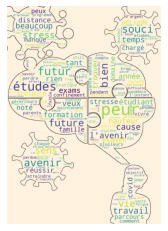

In [16]:
mask = np.array(Image.open("canva.png"))
mask[mask == 1] = 255

wordcloud = WordCloud(background_color = "#fff2df", stopwords = stop_words, max_words = 200, mask = mask,contour_width=3).generate(long_string)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();


In [17]:
#save the wordcloud as a png pic
cloud =  wordcloud.to_file('wordcloud.png')

In [18]:
#functions
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = data.question_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words)

[['avenir'], ['vie', 'restera', 'covid'], [], ['anxiete', 'faiblesse', 'echec', 'parcours', 'scolaire', 'futur', 'ambigue', 'realiser', 'fin', 'compte', 'domaine', 'etudes', 'motives'], ['pense', 'covid', 'maintenant', 'doit', 'oublier'], ['peur', 'devenir', 'depressive'], ['avenir', 'formation', 'donnee', 'niveau', 'etablissement'], ['sens', 'peux', 'respirer', 'cause', 'cumul', 'stress', 'etudes', 'autres', 'responsabilites', 'souvent', 'peux', 'gerer'], ['jour'], ['cache', 'futur'], ['soucis', 'caractere', 'financiere'], ['beaucoup', 'soucis', 'veux', 'terminer', 'etudes', 'veux', 'trouver', 'travail', 'convienne', 'veux', 'fonder', 'famille'], [], ['auto', 'formation', 'meme', 'temps', 'jour', 'ecole', 'epuiserai'], ['little', 'nervous', 'future', 'going', 'get', 'year', 'safely', 'going', 'get', 'job', 'end', 'studies'], ['trouver', 'emploi', 'apres', 'diplome', 'bien', 'aise', 'tete'], ['monfoutisme', 'gens', 'autour', 'pandemie', 'menent', 'fins', 'indesirables'], ['seuls', 'inq

In [19]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [20]:

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:2])

[[(0, 1)], [(1, 1), (2, 1), (3, 1)]]


In [21]:
# number of topics
num_topics = 2
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.026*"peur" + 0.013*"etudes" + 0.011*"avenir" + 0.008*"futur" + '
  '0.008*"bien" + 0.007*"sens" + 0.007*"tres" + 0.007*"vie" + 0.006*"stress" + '
  '0.006*"soucis"'),
 (1,
  '0.011*"peur" + 0.011*"avenir" + 0.010*"etudes" + 0.008*"future" + '
  '0.008*"futur" + 0.006*"soucis" + 0.005*"travail" + 0.005*"veux" + '
  '0.005*"bien" + 0.005*"rien"')]


In [22]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.8721178821847807


In [26]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [29]:
#tuning parameters
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()


  0%|                                                                                          | 0/540 [02:08<?, ?it/s]

  2%|█▋                                                                               | 11/540 [00:36<31:03,  3.52s/it]C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))

 24%|██████████████████▊                                                             | 127/540 [09:19<36:33,  5.31s/it]


 48%|██████████████████████████████████████▎                                         | 259/540 [21:13<26:09,  5.58s/it]


 72%|█████████████████████████████████████████████████████████▉                      | 391/540 [32:22<12:33,  5.06s/it]


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 523/540 [43:56<01:32,  5.44s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 540/540 [45:29<00:00,  5.06s/it]


In [23]:
tun = pd.read_csv("lda_tuning_results.csv")
tun.head()

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.870774
1,75% Corpus,2,0.01,0.31,0.870556
2,75% Corpus,2,0.01,0.61,0.870901
3,75% Corpus,2,0.01,0.9099999999999999,0.871207
4,75% Corpus,2,0.01,symmetric,0.870901


In [24]:
#parameters with max coherence
tun.loc[tun['Coherence'] == max(tun.Coherence)]

,Validation_Set,Topics,Alpha,Beta,Coherence
273,100% Corpus,2,0.01,0.9099999999999999,0.871388


In [23]:
#best model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=2, 
                                           alpha=0.01,
                                           eta=0.9099999999999999)

In [24]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)

pyLDAvis.save_html(LDAvis_prepared, 'output.html')
LDAvis_prepared

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=             x    y  topics  cluster       Freq
topic                                          
0      0.02366  0.0       1        1  59.872664
1     -0.02366  0.0       2        1  40.127336, topic_info=        Term       Freq      Total Category  logprob  loglift
23      peur  21.000000  21.000000  Default  30.0000  30.0000
86   reussir   3.000000   3.000000  Default  29.0000  29.0000
0     avenir  12.000000  12.000000  Default  28.0000  28.0000
349  echouer   3.000000   3.000000  Default  27.0000  27.0000
5    anxiete   3.000000   3.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
29     cause   1.981355   5.541365   Topic2  -5.6914  -0.1153
134    etait   1.978441   5.542312   Topic2  -5.6928  -0.1170
12     futur   2.373037   9.994232   Topic2  -5.5110  -0.5247
42    soucis   1.919724   7.280322   Topic2  -5.7230  -0.4199
67     apres   1.745570   3.901060   Topic2  -5.8181   0.1089

[144 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
66        1  0.971564     aise
209       1  0.649094    annee
209       2  0.216365    annee
5         1  0.326364  anxiete
5         2  0.979092  anxiete
...     ...       ...      ...
50        2  0.650898     veux
3         1  0.440880      vie
3         2  0.440880      vie
473       1  0.304654    vivre
473       2  0.609309    vivre

[175 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])